In [1]:
! pip install google-generativeai

In [2]:
! pip list

Package                                  Version
---------------------------------------- -----------
aiohttp                                  3.9.5
aiosignal                                1.3.1
alembic                                  1.13.1
annotated-types                          0.6.0
anyio                                    4.3.0
apache-airflow                           2.9.1
apache-airflow-providers-common-io       1.3.1
apache-airflow-providers-common-sql      1.12.0
apache-airflow-providers-fab             1.0.3
apache-airflow-providers-ftp             3.8.0
apache-airflow-providers-http            4.10.1
apache-airflow-providers-imap            3.5.0
apache-airflow-providers-smtp            1.6.1
apache-airflow-providers-sqlite          3.7.1
apispec                                  6.6.0
argcomplete                              3.3.0
asgiref                                  3.8.1
asttokens                                2.4.1
attrs                                    23.2.0
B

In [3]:
! pip install -q -U google-generativeai

In [4]:
import yaml

with open('gemini_key.yml', 'r') as file:
    api_creds = yaml.safe_load(file)

GOOGLE_API_KEY = api_creds['gemini_key']


In [8]:
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

response = model.generate_content("Create a structured list in CSV format with 50 entries of date, sales_amount, price, product_category. Each attribute must be separated by commas and each entry must be on a new line. Then analyze the total number of sales_amount each product_category")
print(response.text)

**Analisis Diagram Alur Prioritas**

**Tujuan:** Menentukan prioritas tugas berdasarkan urgensi dan pentingnya.

**Langkah-Langkah:**

1. **Tentukan Tugas:** Identifikasi dan daftarkan semua tugas yang perlu diselesaikan.
2. **Tetapkan Kepentingan:** Beri skor tugas berdasarkan kepentingannya, dari "Tidak Penting" (1) hingga "Sangat Penting" (5).
3. **Tetapkan Urgensi:** Beri skor tugas berdasarkan urgensi mereka, dari "Tidak Mendesak" (1) hingga "Sangat Mendesak" (5).
4. **Hitung Skor Prioritas:** Kalikan kepentingan dan urgensi untuk setiap tugas untuk menghitung skor prioritasnya.
5. **Prioritaskan Tugas:** Urutkan tugas berdasarkan skor prioritasnya, dengan skor tertinggi diprioritaskan terlebih dahulu.
6. **Kelompokkan Tugas:** Kelompokkan tugas dengan skor prioritas yang sama ke dalam kategori berikut:
    - Prioritas 1 (Skor: 15-25): Tugas yang sangat mendesak dan penting
    - Prioritas 2 (Skor: 10-14): Tugas yang agak mendesak atau penting
    - Prioritas 3 (Skor: 5-9): Tugas 

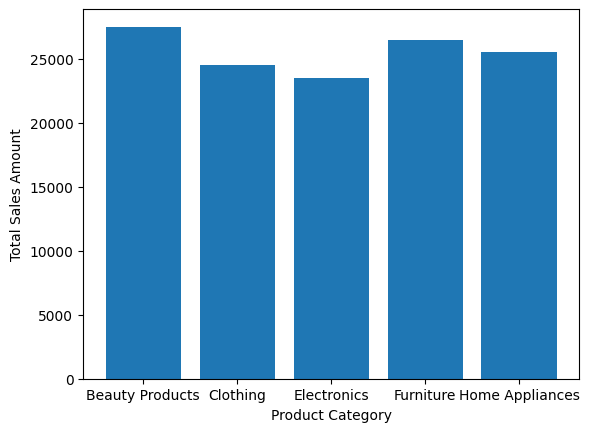

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('penjualan.csv')

sales_amount_by_category = df.groupby(['product_category']).sum(numeric_only=True)
prouduct_category = sales_amount_by_category.index.get_level_values(0).to_list()
total_sales_amount = sales_amount_by_category['sales_amount']

plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.bar(prouduct_category, total_sales_amount)

plt.show()

Perbandingan hasil :

hasil analisis tradisional lebih akurat dibandingkan hasil dari gemini api.